<a href="https://colab.research.google.com/github/RKNahid/Automated-Sleep-Stage-Detection-using-Machine-Learning-Algorithm/blob/main/XGBTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library & Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/REM_NREM.csv")
target = "Sleep_Stage"

##Level Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

##Spliting

In [ ]:
x = df.loc[:,df.columns != target]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

*Balance Dataset*

In [ ]:
x_train, y_train = balance(x_train, y_train)

#Installing XGB

In [ ]:
!pip install xgboost

# Tunning

##N estimator

2300/3500 round completed......................... Accurecy: 0.942368125701459
2400/3500 round completed......................... Accurecy: 0.9424242424242424
2500/3500 round completed......................... Accurecy: 0.9421997755331089
2600/3500 round completed......................... Accurecy: 0.9420875420875421
2700/3500 round completed......................... Accurecy: 0.9420314253647587
2800/3500 round completed......................... Accurecy: 0.9421436588103255
2900/3500 round completed......................... Accurecy: 0.9423120089786756
3000/3500 round completed......................... Accurecy: 0.9424242424242424
3100/3500 round completed......................... Accurecy: 0.9423120089786756
3200/3500 round completed......................... Accurecy: 0.9421436588103255
3300/3500 round completed......................... Accurecy: 0.9424242424242424
3400/3500 round completed......................... Accurecy: 0.942368125701459
3500/3500 round completed.................

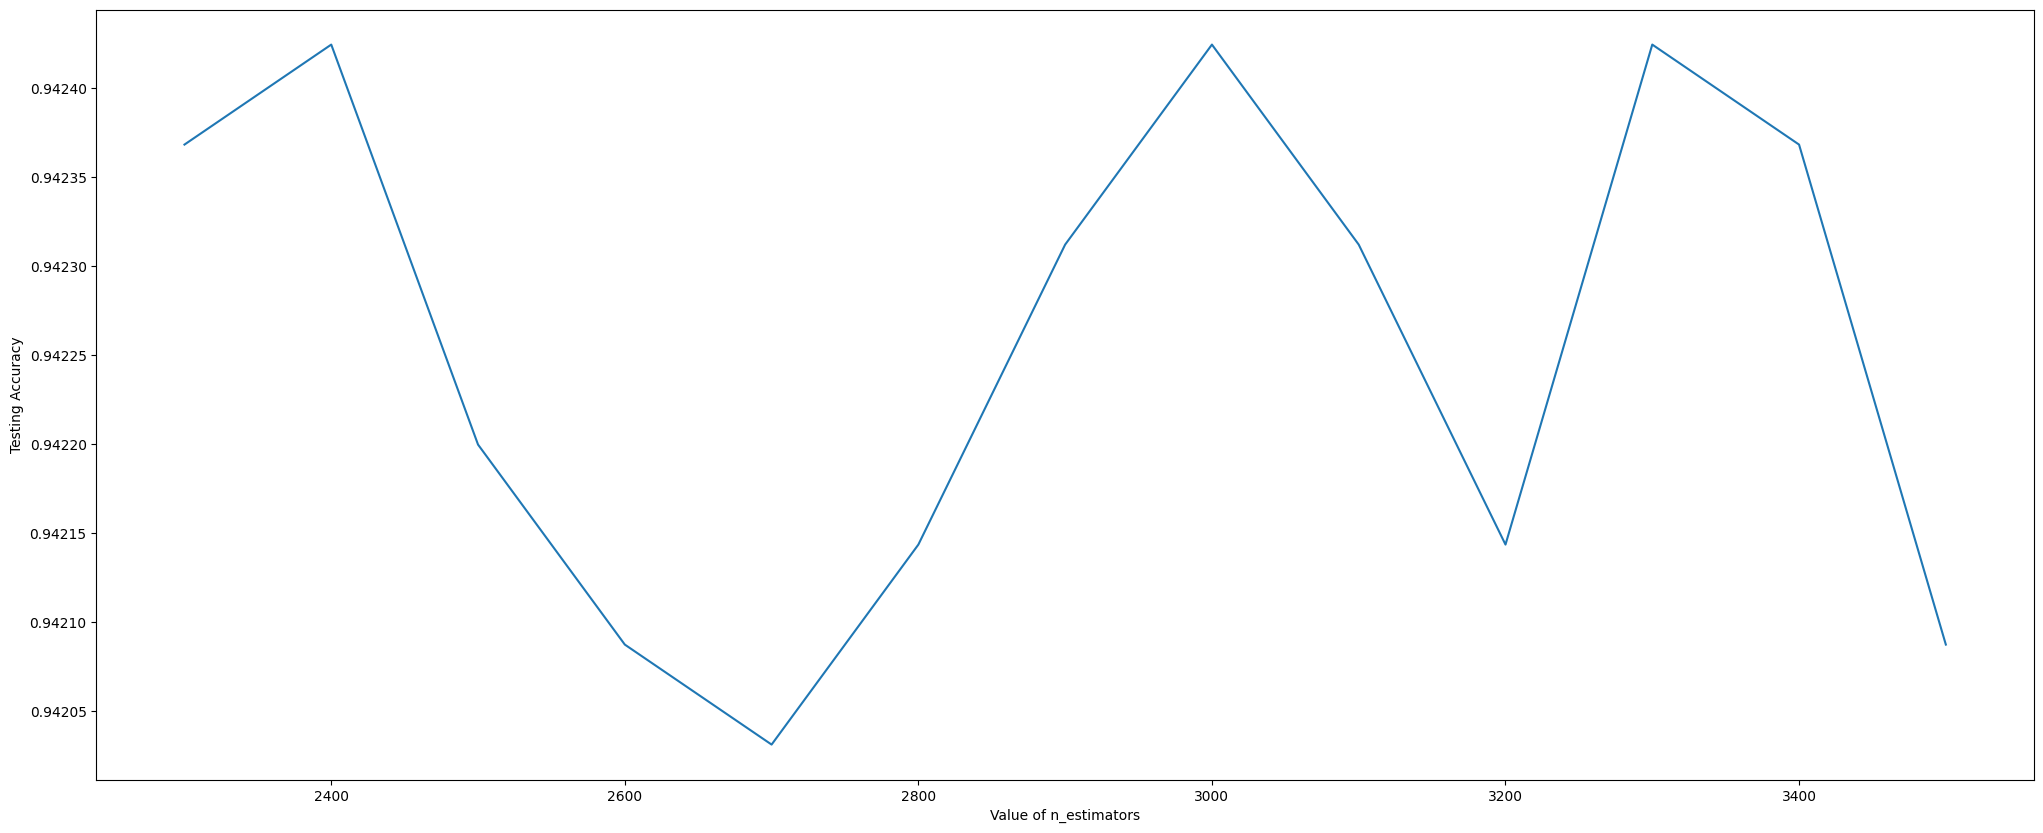

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=3500
k_range = range (2300,N+1,100)
scores={}
scores_list = []
for k in k_range:
  classifier = xgb.XGBClassifier(n_estimators=k)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator = list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)



#2400 final

*Result for Best Estimator*

In [ ]:
%time

import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=2400)
xgb_estimator.fit(x_train, y_train)
y_pred=xgb_estimator.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
[[14114   397]
 [  562  2747]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14511
           1       0.87      0.83      0.85      3309

    accuracy                           0.95     17820
   macro avg       0.92      0.90      0.91     17820
weighted avg       0.95      0.95      0.95     17820

Accurecy:  0.9461840628507295


##Max Depth

1/4000 round completed......................... Accurecy: 0.83658810325477
501/4000 round completed......................... Accurecy: 0.9363636363636364
1001/4000 round completed......................... Accurecy: 0.9363636363636364
1501/4000 round completed......................... Accurecy: 0.9363636363636364
2001/4000 round completed......................... Accurecy: 0.9363636363636364
2501/4000 round completed......................... Accurecy: 0.9363636363636364
3001/4000 round completed......................... Accurecy: 0.9363636363636364
3501/4000 round completed......................... Accurecy: 0.9363636363636364
The best Depth:
501
CPU times: user 45min 16s, sys: 2.94 s, total: 45min 19s
Wall time: 25min 16s


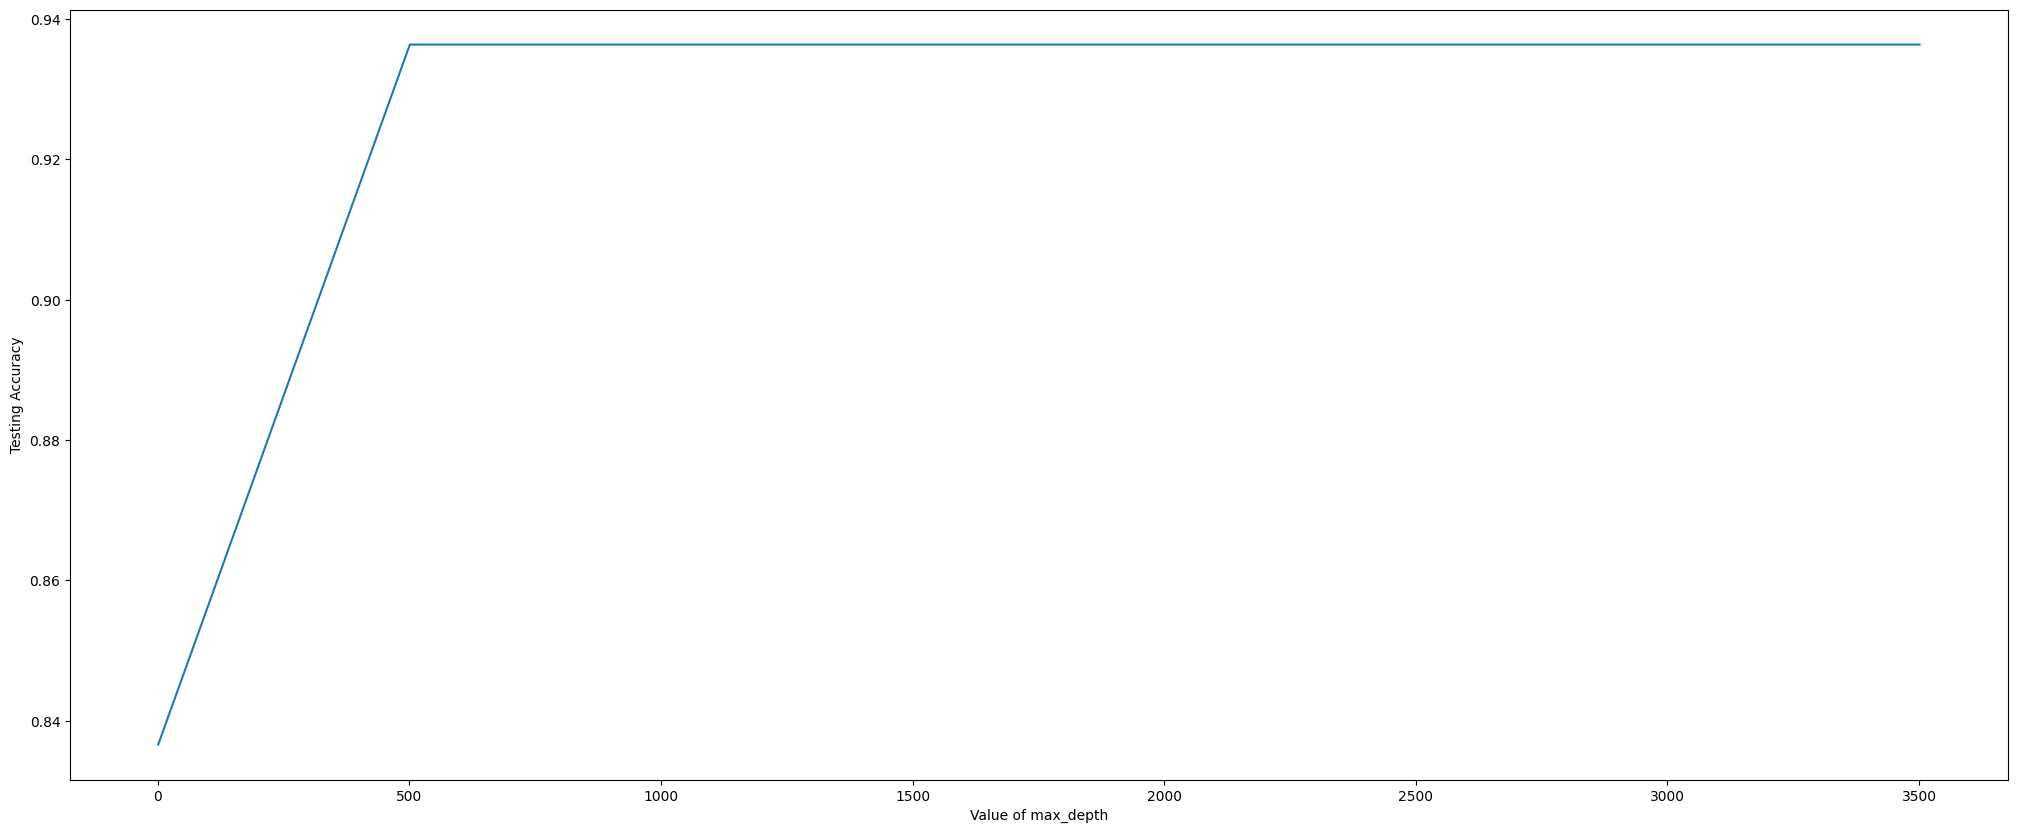

In [ ]:
%%time
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=4000
k_range = range (1,N+1,500)
scores={}
scores_list = []
for k in k_range:
  classifier = xgb.XGBClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)



#500 fixed

*Result for Best Depth*

In [ ]:
%time
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=500,n_jobs = -1)
xgb_depth.fit(x_train, y_train)
y_pred=xgb_depth.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
[[13996   515]
 [  584  2725]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14511
           1       0.84      0.82      0.83      3309

    accuracy                           0.94     17820
   macro avg       0.90      0.89      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.938327721661055


# Result for Full Config

In [ ]:
%time
import xgboost as xgb
xgb_all = xgb.XGBClassifier(max_depth=500,n_estimators=2400)
xgb_all.fit(x_train, y_train)
y_pred=xgb_all.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs
[[14081   430]
 [  556  2753]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14511
           1       0.86      0.83      0.85      3309

    accuracy                           0.94     17820
   macro avg       0.91      0.90      0.91     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.944668911335578
